Это моя первая лабораторная по ТМО.
Был взыт учебный датасет цены квартир в определенных районах города

7.1.1. Boston house prices dataset

https://scikit-learn.org/stable/datasets/toy_dataset.html

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


Number of Instances: 506

Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

Attribute Information (in order)

**CRIM** per capita crime rate by town. *Уровень преступности на душу населения по городам*

**ZN** proportion of residential land zoned for lots over 25,000 sq.ft.
*Доля жилой земли, зонированной на участки площадью более 25 000 кв.футов.*

**INDUS** proportion of non-retail business acres per town. *Доля акров, не связанных с розничной торговлей, на город*

**CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). *Фиктивная переменная реки Чарльз (= 1, если тракт ограничивает реку; 0 в противном случае)*

**NOX** nitric oxides concentration (parts per 10 million). *Концентрация оксидов азота (частей на 10 миллионов)*

**RM** average number of rooms per dwelling. *Среднее количество комнат в жилом помещении*

**AGE** proportion of owner-occupied units built prior to 1940. *Доля квартир, занятых владельцами, построенных до 1940 года*

**DIS** weighted distances to five Boston employment centres. *Взвешенные расстояния до пяти бостонских центров занятости*

**RAD** index of accessibility to radial highways. *Индекс доступности к радиальным магистралям*

**TAX** full-value property-tax rate per $10,000. *Полная стоимость недвижимости - ставка налога за 10 000 долларов США*

**PTRATIO** pupil-teacher ratio by town. *Соотношение учащихся и учителей по городам*

**B** 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town. (**B** 1000(Bk - 0,63)^2, где Bk - доля чернокожих по городам)

**LSTAT** % lower status of the population. *Более низкий статус населения*

**MEDV** Median value of owner-occupied homes in $1000’s *Средняя стоимость домов, занятых владельцами, в 1000 долларов США*

Missing Attribute Values: 0

Датасет состоит из файла:

housing_data.txt

Данные внутри этого файла описаны выше, разделительный элемент - пробел.


## Импорт библиотек


Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы сделаем это последовательно, по мере их использования.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")


# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/My Drive/housing_data.csv'

Mounted at /content/drive


In [ ]:
filename = '/content/drive/My Drive/housing_data.csv'
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv(filename, sep = ' ')

# 2) Основные характеристики датасета

In [ ]:
# Первые 5 строк датасета
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Размер датасета - 506 строк, 13 колонок
data.shape

(506, 14)

In [ ]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 506


In [ ]:
# Список колонок
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# Список колонок с типами данных
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CRIM - 0
ZN - 0
INDUS - 0
CHAS - 0
NOX - 0
RM - 0
AGE - 0
DIS - 0
RAD - 0
TAX - 0
PTRATIO - 0
B - 0
LSTAT - 0
MEDV - 0


Пустых значений нет, это можно видеть по нулям рядом с заголовками значений.

In [ ]:
# Основные статистические характеристки набора данных
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Определим уникальные значения для целевого признака
data['B'].unique()

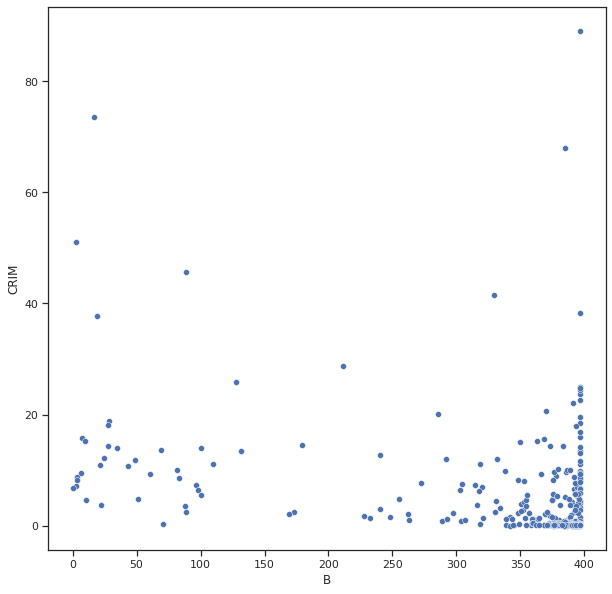

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='B', y='CRIM', data=data)

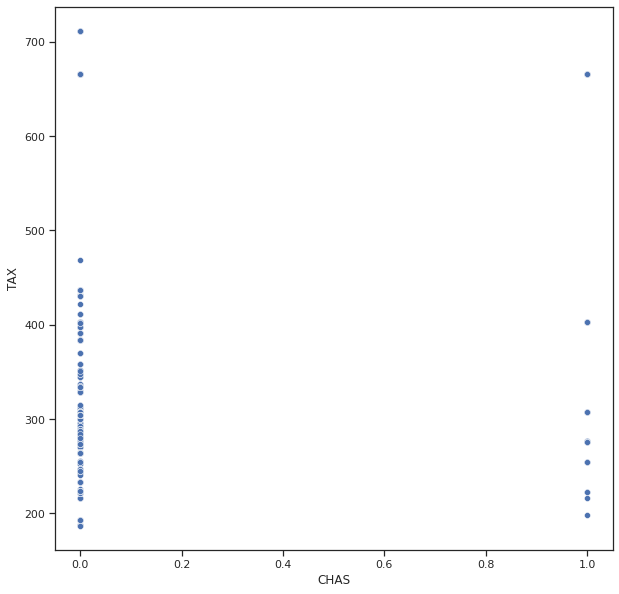

In [ ]:
#Результат не показан, так как он есть далее с выводом
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='CHAS', y='TAX', data=data)